In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
#loading data from google's past 1 year stock price
database = pd.read_csv("HistoricalQuotes.csv")

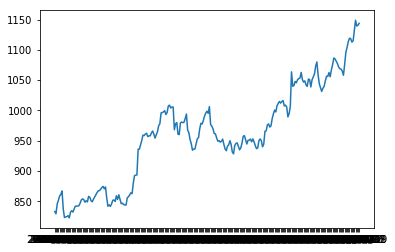

In [85]:
plt.plot(database.date,database.high)
plt.show()

In [86]:
# now lets just take important data
X = database[["date","high"]]

In [108]:
# lets compute the exponential smoothing
def smoothing(arr,a):
    exp_sm = []
    exp_sm.append(arr[0])
    prev = arr[0]
    for i in range(1,len(arr)):
        exp_sm.append(a*arr[i] + (1-a)*prev)
        prev = exp_sm[-1]
    return exp_sm

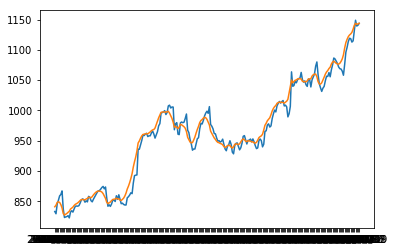

In [109]:
plt.plot(X.date,X.high)
plt.plot(X.date,smoothing(X.high,0.25))
plt.show()

In [110]:
# i think its wayy too cluttered so lets check only 1/10 th on the data
print(len(X))
Y = X[::len(X)//(len(X)//10)]
print(len(Y))

253
26


In [111]:
Y = Y.reset_index()
print(Y)

    index        date       high
0       0  2018/01/19  1143.7797
1      10  2018/01/04  1104.0765
2      20  2017/12/19  1084.9750
3      30  2017/12/05  1036.6800
4      40  2017/11/20  1038.6950
5      50  2017/11/06  1052.5900
6      60  2017/10/23  1005.7938
7      70  2017/10/09  1000.4600
8      80  2017/09/25   939.7500
9      90  2017/09/11   952.6800
10    100  2017/08/25   940.7300
11    110  2017/08/11   933.3600
12    120  2017/07/28   961.7900
13    130  2017/07/14   977.5400
14    140  2017/06/29   951.6600
15    150  2017/06/15   960.6775
16    160  2017/06/01   993.1400
17    170  2017/05/17   960.9900
18    180  2017/05/03   950.2000
19    190  2017/04/19   860.2000
20    200  2017/04/04   853.0000
21    210  2017/03/21   873.4700
22    220  2017/03/07   853.3300
23    230  2017/02/21   852.2000
24    240  2017/02/06   822.3900
25    250  2017/01/23   845.5428


In [112]:
# lets compute the exponential smoothing


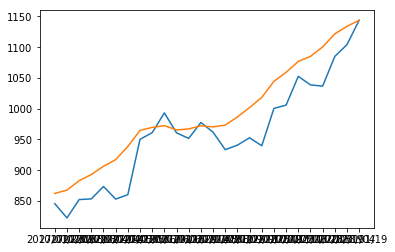

In [115]:
plt.plot(Y.date,Y.high)
plt.plot(Y.date,smoothing(Y.high,0.25))
plt.show()

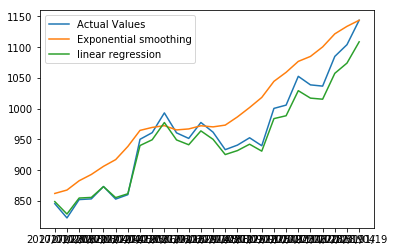

In [116]:
#linear model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# now the input is previous month's points and output is
X_train = Y.high[:-1].values.reshape(-1, 1)
y_train = Y.high[1:]
reg.fit(X_train,y_train)
plt.plot(Y.date,Y.high,label='Actual Values')
plt.plot(Y.date,smoothing(Y.high,0.25),label = "Exponential smoothing")
plt.plot(Y.date,[reg.predict(i) for i in Y.high] , label = "linear regression")
plt.legend()
plt.show()